In [7]:
import numpy as np
# import sys
import pandas as pd
import os
import pickle
import scipy.io as sio
import ieeg_funcs as ief
# import re
import dgFuncs as dg
from sklearn import preprocessing
# from scipy import stats
# from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from matplotlib import cm
# %matplotlib notebook

Model names: ['eu_svm_sbox1_1096', 'eu_svm_sbox3_1096', 'eu_svm_sbox7_1096', 'eu_svm_sbox4_1096', 'eu_svm_sbox2_1096', 'eu_svm_sbox6_1096', 'eu_svm_sbox5_1096']


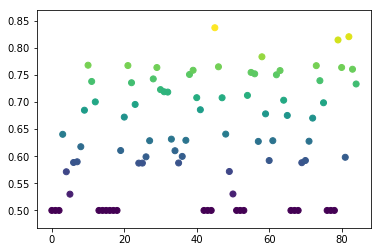

In [16]:
#/home/dgroppe/GIT/SZR_ANT/MODELS/eu_svm_sbox7_1096
in_path='/home/dgroppe/GIT/SZR_ANT/MODELS/'
model_names=list()
for fname in os.listdir(in_path):
    if fname.startswith('eu_svm_sbox'):
        model_names.append(fname)
    
print('Model names: {}'.format(model_names))
C_list=list()
g_list=list()
vbacc_list=list()
for mname in model_names:
    metrics_fname=os.path.join(in_path,mname,'classification_metrics.npz')
    metrics=np.load(metrics_fname)
    C_list=C_list+metrics['C_list'].tolist()
    g_list=g_list+metrics['g_list'].tolist()
    vbacc_list=vbacc_list+metrics['valid_bal_acc_list'].tolist()

# C_list=metrics['C_list']
C_ray=np.asarray(C_list)
# print(C_ray)
# g_list=metrics['g_list']
g_ray=np.asarray(g_list)
# print(g_ray)
# vbacc_list=metrics['valid_bal_acc_list']
vbacc_ray=np.asarray(vbacc_list)
# print(vbacc_ray)

plt.figure(1)
plt.scatter(np.arange(len(vbacc_ray)),vbacc_ray,c=vbacc_ray)

Max validation balanced accuracy is 0.836988
Using C=1.000000 and gamma=0.000123


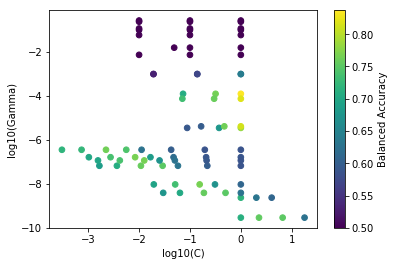

In [35]:
fig=plt.figure(3)
plt.clf()
#ax = fig.add_subplot(111, projection='3d')
plt.scatter(np.log10(C_ray),np.log10(g_ray),c=vbacc_ray,s=32)
plt.xlabel('log10(C)')
plt.ylabel('log10(Gamma)')
cbar=plt.colorbar()
cbar.set_label('Balanced Accuracy', rotation=90)

# cbar = plt.colorbar(heatmap)
# cbar.ax.set_yticklabels(['0','1','2','>3'])
# cbar.set_label('# of contacts', rotation=270)

print('Max validation balanced accuracy is %f' % np.max(vbacc_ray))
argmx=np.argmax(vbacc_ray)
print('Using C=%f and gamma=%f' % (C_ray[argmx],g_ray[argmx]) )



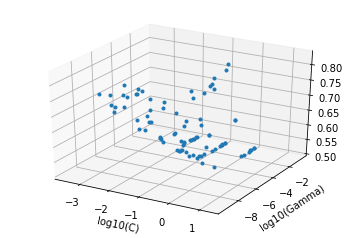

In [30]:
fig=plt.figure(2)
plt.clf()
ax = fig.add_subplot(111, projection='3d')
plt.plot(np.log10(C_ray),np.log10(g_ray),vbacc_ray,'.')
#plt.scatter(np.log10(C_ray),np.log10(g_ray),vbacc_ray,'.')
ax.set_xlabel('log10(C)')
ax.set_ylabel('log10(Gamma)')
#ax.set_zlim(np.min(vbacc_ray), 1)

In [5]:
metrics_fname='/home/dgroppe/GIT/SZR_ANT/MODELS/eu_svm_sbox7_1096/classification_metrics.npz'
metrics=np.load(metrics_fname)
metrics.keys()

['train_sens',
 'train_spec',
 'train_bal_acc',
 'test_acc',
 'test_sens',
 'test_spec',
 'test_bal_acc',
 'valid_acc',
 'valid_sens',
 'valid_spec',
 'valid_bal_acc',
 'tfull_acc',
 'tfull_sens',
 'tfull_spec',
 'tfull_bal_acc',
 'C_list',
 'g_list',
 'valid_bal_acc_list',
 'train_bal_acc_list',
 'best_valid_bal_acc',
 'best_train_bal_acc',
 'best_g',
 'best_C']

In [3]:
C_list=metrics['C_list']
C_ray=np.asarray(C_list)
print(C_ray)
g_list=metrics['g_list']
g_ray=np.asarray(g_list)
print(g_ray)
vbacc_list=metrics['valid_bal_acc_list']
vbacc_ray=np.asarray(vbacc_list)
print(vbacc_ray)

[ 1.          0.1         0.01        1.          0.47337462  0.16583718
  1.          0.29880469  0.07093542]
[  1.15407770e-01   1.15407770e-01   1.15407770e-01   4.06489851e-06
   4.06489851e-06   4.06489851e-06   7.36114367e-05   7.36114367e-05
   7.36114367e-05]
[ 0.5         0.5         0.5         0.81443503  0.76364742  0.5980346
  0.82042844  0.76043462  0.73322944]


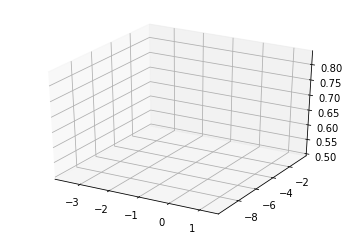

In [49]:
fig = plt.figure(3)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(np.log10(C_ray),np.log10(g_ray),vbacc_ray, cmap=cm.coolwarm,linewidth=2, antialiased=False)